**CIS5523 KDDM Homework 6**

**Name: Qi Zhang**

**TUid: 916066970**

# Problem 1: (15 points)

**1. Illustrate an example of the vanishing gradient problem for a deep neural network (with many hidden layers) if using the sigmoid activation function.**

**Solution**:

<font size="4">As we all know, the sigmod function squishes the input data into the range of [0, 1]. So the large change of the input data only cause small change in the output. And the derivative of sigmod is even smaller, which is close to the zero(largest value is near 0.22). Please see the code and plot figure below.

In the neural network, backpropagation is used for gradient, which finds the derivatives of each layer of the network. The derivatives of each layer are multiplied down the network by the chain rule. When use the sigmod as active function for a deep neural network, the gradients are small, which means that the weights and biases of the initial layers cannot be updated effectively and sometimes even drop.</font>

**2. What is a way to overcome this problem (explain how)?**

**Solution**

<font size="4">

a. Use the ReLU as the active function. ReLU provides the gradient either 0 or 1. So the gradient will not diminish.

b. Use the residual netowrks. Since residual network provides the residual connections, so the later layers can connect to the earlier layers straightly.

c. Use the batch normalization. Like the the sigmod and its derivate figure showed below, most value are mapped to near 0. Use the BN and normalize the input data into special range like x in range [-2.5, 2.5] in the below figure. Then the derivatives are not too small.</font>

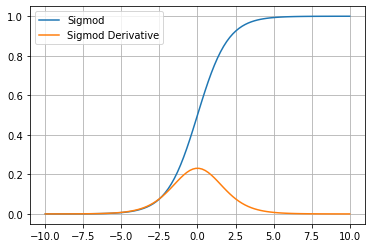

In [7]:
import matplotlib.pyplot as plt
from scipy.misc import derivative
import numpy as np
import math


def sigmod(x):
    return 1/(1 + np.exp(-x))

def deriv(x):
    return derivative(sigmod, x)

x = np.linspace(-10, 10, 100)

plt.plot(x, sigmod(x),label = "Sigmod")
plt.plot(x, deriv(x),label = "Sigmod Derivative")
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

# Problem 2: (15 points)

The leader algorithm represents each cluster using a point, known as a leader, and assigns each point to the cluster corresponding to the closest leader unless this distance is above a user-specified threshold. In that case, the point becomes the leader of a new cluster.

(a) What are the advantages and disadvantages of the leader algorithm as compared to K-means?

**Solution:**

<font size="4">
Advantage: 

Leader algorithm only requires a single scan of the data, which makes it more efficiently. But in K-means, each object is compared to the final set of centroids at most once.
</font>

<font size="4">
Disadvantage: 

1. Leader algorithm is sencetive to the order. If we change the order of the data points, the result weill be changed.

2. Leader algorithm cannot set the number of clusters like k-means.

3. K-means compute the sum of squared error(SSE) for some value of K to get better quality of clustering.

</font>

(b) Suggest ways in which the leader algorithm might be improved.

**Solution**

<font size="4">

1. Use multiple thresholds rather than one in each pass.

2. Sample some data points to understand the determine the distribution of distances between the points. Then use the information to set the thresold more intelligently.
</font>


# Problem 3: (10 points)

Tranditional agglomerative hierarchical clustering routines merge two clusters at each step.

Does it seem likely that such an approach accurately captures the (nested) cluster structure of a set of data points? If not, explain how you might post-process the data to obtain a more accurate view of the cluster structure.

**Solution:**

<font size="4">

No. Tranditional approach cannot capture the nested cluster structure of a set of data points. When a structure has splits with children, each cluster of the structure will contain sub-clusters. For example, one set of 3 clusters, and each of them has three subclusters.  

Post-process: Flatten the hierachical clustering by moving the clusters up the tree.
</font>

# Problem 4: (40 points)

Download and install CLUTO software for clustering high dimensional data (http://glaros.dtc.umn.edu/gkhome/cluto/cluto/overview (Links to an external site.)).

Apply this software to cluster Enron Emails dataset available at 

https://archive.ics.uci.edu/ml/datasets/Bag+of+Words (Links to an external site.)

(a) Report clustering results when using partitional clustering in the CLUTO package. You are allowed to apply CLUTO on a sample if the data is too large for your computer. In such a case report the sample size you used and how consistent the result is if you repeat experiments 3 times on 3 samples of that size.

(b) Report results when using agglomerative clustering algorithms in the CLUTO package. In agglomerative clustering compare the results of when using complete-link vs. single-link merging schemes. Then, for single-link merging compare the results when using cosine versus Euclidean distance function.

In [8]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

In [11]:
#load the docword enron
df_enron= pd.read_table('./docword.enron.txt', header=None, sep=' ', skiprows = 3)
df_enron.columns = ['docID', 'wordID', 'count']

#load the vocab
df_vocab = pd.read_table('vocab.enron.txt', header=None)
df_vocab.columns = ['word']
df_vocab['wordID'] = range(1, len(df_vocab)+1)

#merge two dataframe since the format of the vocab.*.txt file is line contains wordID=n.
df = pd.merge(df_enron, df_vocab, on = 'wordID', how = 'left')
df.head()

,docID,wordID,count,word
0,1,118,1,access
1,1,285,1,additional
2,1,1229,1,april
3,1,1688,1,authorize
4,1,2068,1,basis


In [13]:
#transform the sparse dataframe to dense matrix
df = df.drop('wordID', axis=1)
df_pivot = pd.pivot_table(df, values = 'count', index = ['docID'], columns = ['word'], fill_value = 0)
df_pivot

word,aaa,aaas,aactive,aadvantage,aaker,aap,aapg,aaron,aarp,aas,...,zoo,zooey,zoom,zoomed,zoomerang,zshop,zufferli,zukav,zurich,zycher
docID,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39857,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39858,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39859,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,docID,wordID,count
0,1,118,1
1,1,285,1
2,1,1229,1
3,1,1688,1
4,1,2068,1
...,...,...,...
3710415,39861,18448,1
3710416,39861,18848,1
3710417,39861,23449,1
3710418,39861,25721,1


# Problem 5: (20 points)

### 1. Text and web mining

### 2. 